<a href="https://colab.research.google.com/github/gopaljigupta45/YES_BANK_STOCK_PRICE_PREDICTION/blob/main/Yes_bank_stock_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROBLEM STATEMENT :-**

### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.



### ***Our main objective is to predict the stock’s closing price of the month.*** 


---




## **Loading the libraries and the data.**
---


In [137]:
# importing the libraries we'll need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [138]:
# Mounting google drive to load the data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
# Loading our dataset.
df = pd.read_csv('/content/drive/MyDrive/Yes Bank Stock Closing Price Prediction - GOPAL JI GUPTA/data_YesBank_StockPrices.csv')

In [140]:
# Taking a look at the data.
df.head()          # displays first five instances of the dataframe.

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


Explaining the data:-
We have a dataset containing values of Yes bank monthly stock prices as mentioned in our problem statement. 

Explaining the features present :-


*  **Date :-** The date (Month and Year provided)
*  **Open :-** The price of the stock at the beginning of a particular month.
*  **High :-**The Peak(Maximum) price at which a stock traded during the month.
*  **Low :-**The Lowest price at which a stock traded during the month.
*  **Close :-** The trading price at the end of the month.

## **Data Cleansing.**

---

In [141]:
# Checking for null values.
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [142]:
# So there are no null values in our dataset.
# Getting information about our data - its datatypes, its size etc. also printing the shape of the data.
df.info()
print('\n', f'The shape of the dataset is : {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB

 The shape of the dataset is : (185, 5)


In [143]:
# getting descriptive statistics of the data.
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [144]:
# Let us now preserve the original data before we operate on it.
preserved_stock_data = df.copy()

In [145]:
# Checking for duplicate instances.
df[df.duplicated()==True]

,Date,Open,High,Low,Close


In [146]:
# So there is no duplicate data in our dataframe.
# checking the datatypes once more.
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [147]:
# as we can see, Date column has the object datatype. 
df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [148]:
# we need to modify this before passing it to a model.
# lets convert Date column to a proper datetime datatype.
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))     # this converts date to a yyyy-mm-dd format.

In [149]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


Since we are trying to track variation in stock price on different dates, it makes sense to set this column as index.

In [150]:
df.set_index('Date', inplace=True)           # setting Date column as index.

In [151]:
# checking the data.
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


We can see from the dataframe above, all the columns we have contain numerical data. There is no categorical data present.

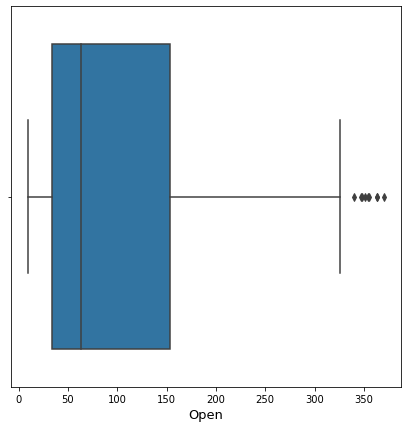

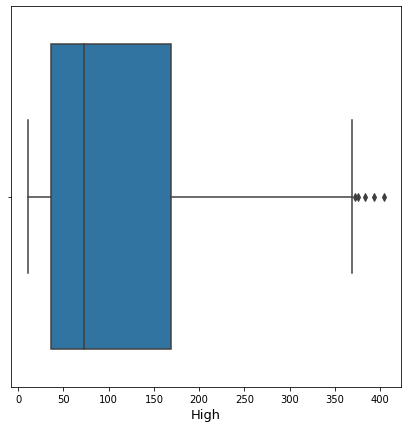

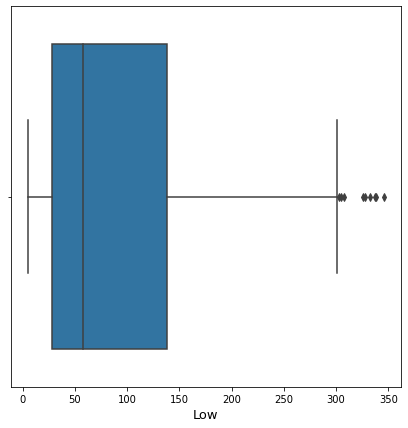

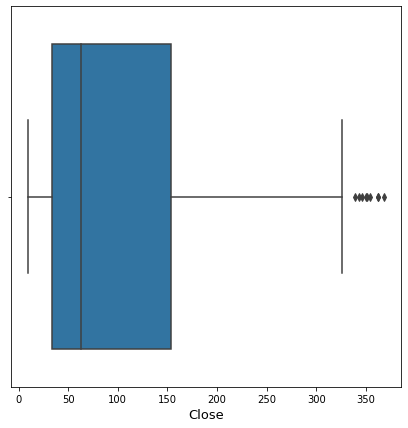

In [152]:
# Checking all features for presence of outliers.
for col in df.columns:
  plt.figure(figsize=(7,7))
  sns.boxplot(df[col])
  plt.xlabel(col, fontsize=13)
  plt.show()

As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.

## **EDA**


---



In [153]:
# Separating the dependent and independent variables.
independent_variables = df.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


Text(0.5, 1.0, 'Closing Price with Date')

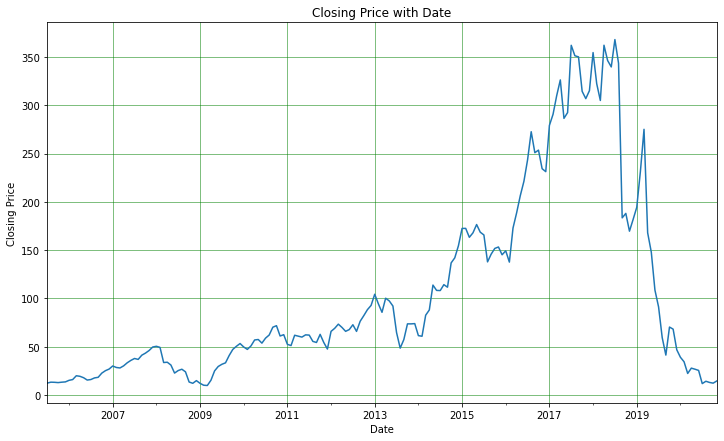

In [154]:
# Plotting the dependent variable .
plt.figure(figsize=(12,7))
df['Close'].plot()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')

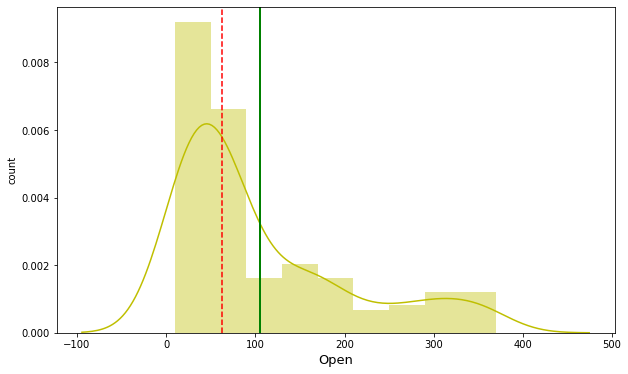

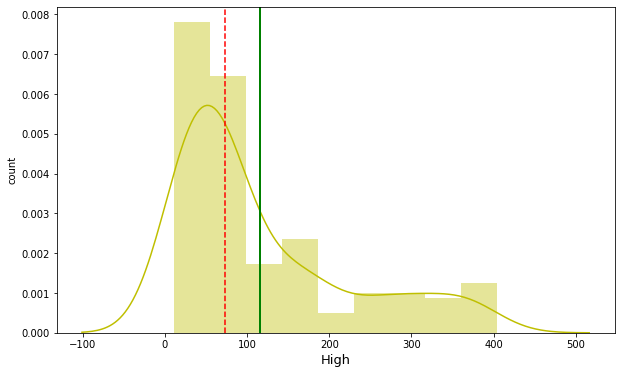

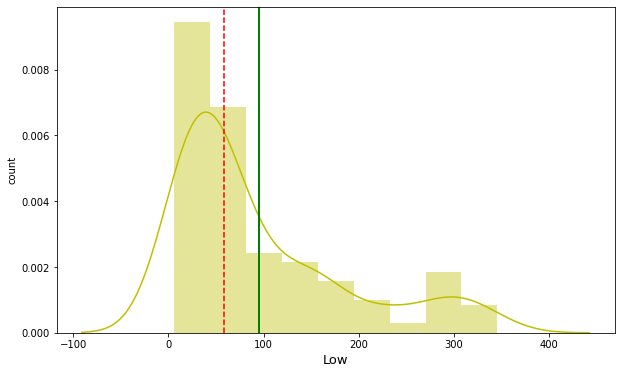

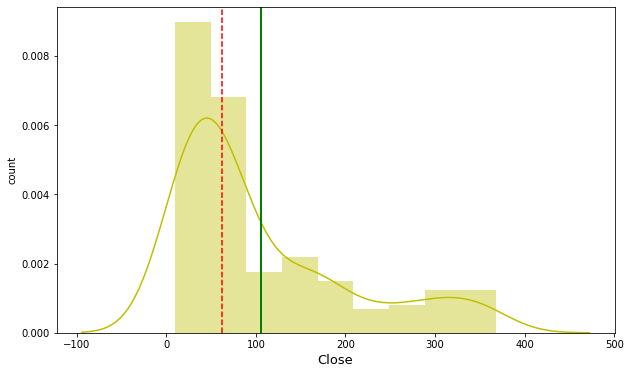

In [155]:
# Plotting the distributions of all features.
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col], color='y')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(df[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
  plt.axvline(df[col].median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

We can clearly see that these distributions are positively skewed. The mean and median are at significant distance from each other.

 So we need to transform them into something close to a Normal Distribution as our models give optimal results that way.

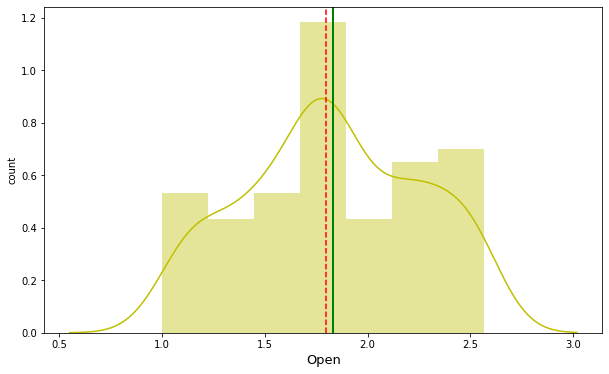

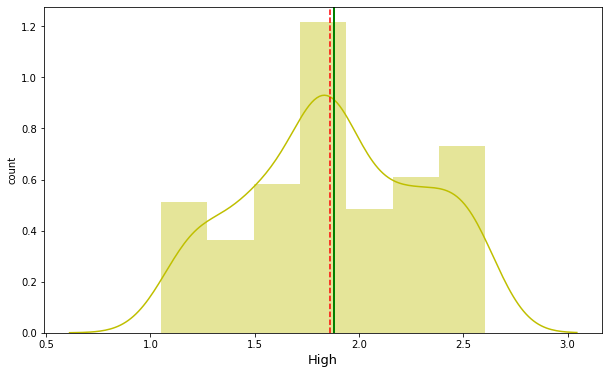

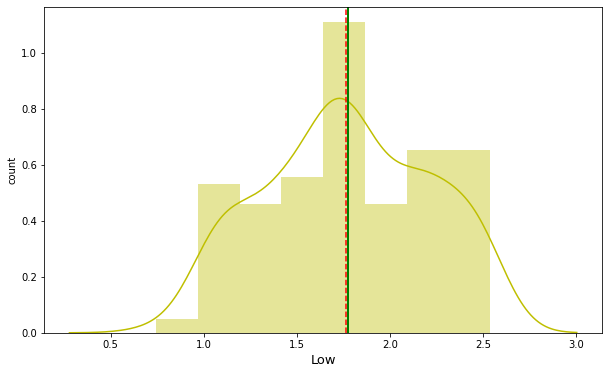

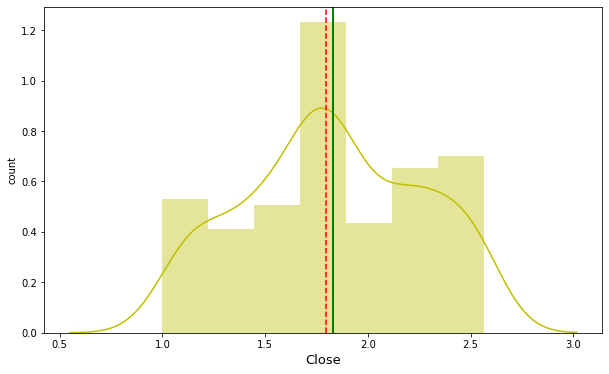

In [156]:
# Lets use log transformation on these features using np.log() and plot them.
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(np.log10(df[col]), color='y')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(np.log10(df[col]).mean(),color='green',linewidth=2) 
  plt.axvline(np.log10(df[col]).median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

Now, the distributions are very similar to Normal distribution. The mean and median values are nearly same.

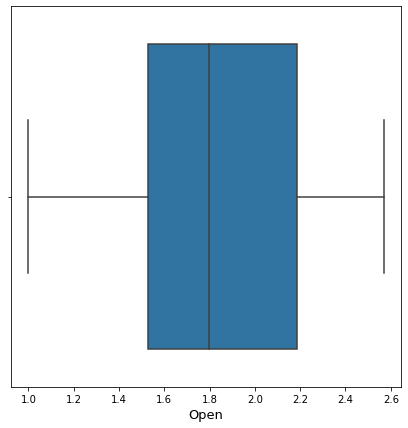

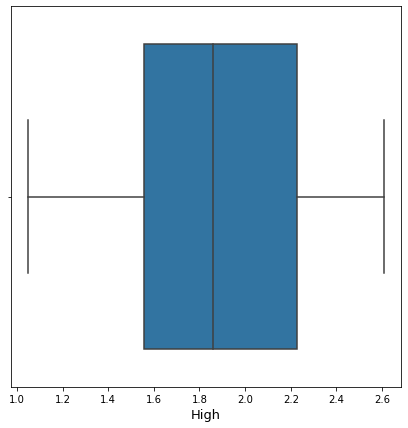

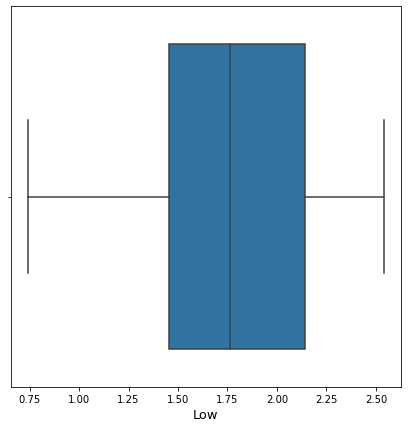

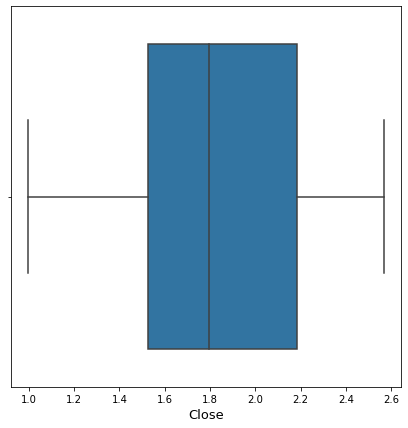

In [157]:
# Let's check for outliers now in the transformed variable data.
for col in df.columns:
  plt.figure(figsize=(7,7))
  sns.boxplot(np.log10(df[col]))
  plt.xlabel(col, fontsize=13)
  plt.show()

Now, we have no outliers anymore. Log transformation diminishes the outliers effect. 

Since we have a very small dataset to work with, dropping the outliers completely is not a good idea. So this is how we are going to leave them.